In [2]:
# prompt: load dataset from here /content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/Group Cases/Case 3/DSO528_Case3_clustering.csv

import pandas as pd

# Load the dataset from your Google Drive
chow_hound = pd.read_csv('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/Group Cases/Case 3/DSO528_Case3_clustering.csv')

# Now you can work with the DataFrame 'df'
chow_hound.head()


,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate
0,29.248825,27.229307,2.955604,4.025227,17.713847,3.955385,0.642557,0.892293,9/4/22
1,21.841138,28.774165,3.177375,2.597784,8.171490,15.809454,1.528008,0.667430,8/7/22
2,24.718422,39.969681,1.377491,1.989893,6.038549,4.555131,9.078386,18.307722,11/22/21
3,21.756908,31.745682,0.943966,18.070805,10.364062,1.215660,0.624555,1.470601,6/12/22
4,32.813984,35.950385,2.825483,8.601173,8.443659,5.493652,5.548047,7.863855,12/18/22


# Question 1

In [4]:
# prompt: create a new column of Time indicating membership length in year for all rows. It can be derived from JoinDate column to today

import pandas as pd
from datetime import datetime

# Assuming 'JoinDate' is in a format like 'YYYY-MM-DD'
chow_hound['JoinDate'] = pd.to_datetime(chow_hound['JoinDate'])

# Calculate the difference between today and the join date in years
chow_hound['Time'] = (datetime.now() - chow_hound['JoinDate']).dt.days / 365.25

chow_hound.head()


,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate,Time
0,29.248825,27.229307,2.955604,4.025227,17.713847,3.955385,0.642557,0.892293,2022-09-04,2.080767
1,21.841138,28.774165,3.177375,2.597784,8.171490,15.809454,1.528008,0.667430,2022-08-07,2.157426
2,24.718422,39.969681,1.377491,1.989893,6.038549,4.555131,9.078386,18.307722,2021-11-22,2.863792
3,21.756908,31.745682,0.943966,18.070805,10.364062,1.215660,0.624555,1.470601,2022-06-12,2.310746
4,32.813984,35.950385,2.825483,8.601173,8.443659,5.493652,5.548047,7.863855,2022-12-18,1.793292


# Question 2

For n_clusters = 3, the average silhouette_score is : 0.247384636348021
For n_clusters = 4, the average silhouette_score is : 0.32192880365538196
For n_clusters = 5, the average silhouette_score is : 0.36511577113651394
For n_clusters = 6, the average silhouette_score is : 0.3268368091168116
For n_clusters = 7, the average silhouette_score is : 0.3349419529140915
For n_clusters = 8, the average silhouette_score is : 0.29857666360726576
For n_clusters = 9, the average silhouette_score is : 0.2508827786640621
For n_clusters = 10, the average silhouette_score is : 0.21137206519735913


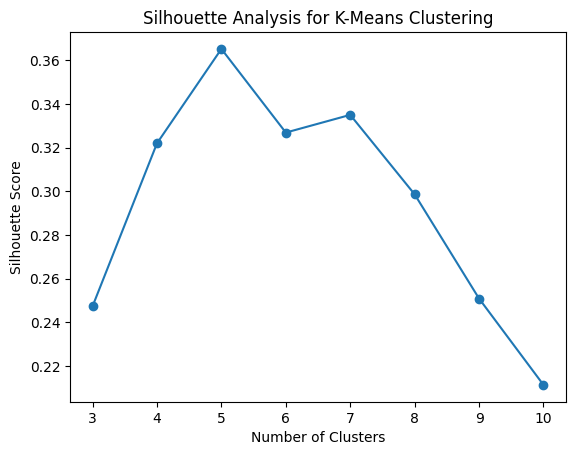

In [9]:
# prompt: using all variables except JoinDate, implement k-means clustering for cluster between 3 and 10. analyze the results with silhouette analysis and visualize it

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features for clustering, excluding 'JoinDate'
features = chow_hound.drop(['JoinDate'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create an empty list to store silhouette scores
silhouette_scores = []

# Iterate through different cluster numbers
for n_clusters in range(3, 11):
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Print the silhouette score for each cluster number
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


# Plot the silhouette scores
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.show()



In [14]:
# prompt: use k-means with number of clusters = 5 and save the cluster column in the chow_hound dataframe without using JoinDate column

# Select features for clustering, excluding 'JoinDate'
features = chow_hound.drop(['JoinDate'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering with n_clusters = 5
kmeans = KMeans(n_clusters=5, random_state=528)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
chow_hound['Cluster'] = cluster_labels


In [15]:
chow_hound.describe()

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate,Time,Cluster
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420,420.000000,420.000000
mean,25.863349,39.326242,2.827597,6.390980,8.389281,9.453812,5.454048,9.638121,2022-06-21 17:05:08.571428352,2.284156,1.854762
min,20.089566,10.496802,0.021648,0.054600,0.026003,0.000447,0.016324,0.000150,2021-11-15 00:00:00,1.193703,0.000000
25%,23.728772,33.164619,0.778902,1.756416,3.260572,2.649286,1.235163,1.607752,2022-01-30 18:00:00,2.000684,1.000000
50%,24.579517,40.500948,1.742489,4.678747,6.758851,7.733219,3.717111,5.200925,2022-05-31 12:00:00,2.342231,2.000000
75%,28.613336,46.696802,3.350457,8.646358,12.377723,14.938225,7.948731,15.415289,2022-10-03 06:00:00,2.672827,3.000000
max,34.991193,60.845802,42.602949,32.831839,30.253100,35.760739,29.065525,43.591156,2023-07-25 00:00:00,2.882957,4.000000
std,3.098497,10.037676,3.985065,6.048664,6.495150,7.890449,5.570200,10.134906,NaN,0.453165,1.378440


# Question 3

In [17]:
# prompt: make a copy of chow_hound dataframe, use k-means with number of clusters = 6 and save the cluster column in the chow_hound dataframe without using JoinDate column

# Make a copy of the DataFrame
chow_hound_copy = chow_hound.copy()

# Select features for clustering, excluding 'JoinDate'
features = chow_hound_copy.drop(['JoinDate'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering with n_clusters = 6
kmeans = KMeans(n_clusters=6, random_state=528)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame (chow_hound)
chow_hound_copy['Cluster'] = cluster_labels

chow_hound_copy.head()

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate,Time,Cluster
0,29.248825,27.229307,2.955604,4.025227,17.713847,3.955385,0.642557,0.892293,2022-09-04,2.080767,0
1,21.841138,28.774165,3.177375,2.597784,8.171490,15.809454,1.528008,0.667430,2022-08-07,2.157426,0
2,24.718422,39.969681,1.377491,1.989893,6.038549,4.555131,9.078386,18.307722,2021-11-22,2.863792,1
3,21.756908,31.745682,0.943966,18.070805,10.364062,1.215660,0.624555,1.470601,2022-06-12,2.310746,0
4,32.813984,35.950385,2.825483,8.601173,8.443659,5.493652,5.548047,7.863855,2022-12-18,1.793292,2


In [18]:
chow_hound_copy.describe()

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate,Time,Cluster
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420,420.000000,420.000000
mean,25.863349,39.326242,2.827597,6.390980,8.389281,9.453812,5.454048,9.638121,2022-06-21 17:05:08.571428352,2.284156,2.330952
min,20.089566,10.496802,0.021648,0.054600,0.026003,0.000447,0.016324,0.000150,2021-11-15 00:00:00,1.193703,0.000000
25%,23.728772,33.164619,0.778902,1.756416,3.260572,2.649286,1.235163,1.607752,2022-01-30 18:00:00,2.000684,1.000000
50%,24.579517,40.500948,1.742489,4.678747,6.758851,7.733219,3.717111,5.200925,2022-05-31 12:00:00,2.342231,2.000000
75%,28.613336,46.696802,3.350457,8.646358,12.377723,14.938225,7.948731,15.415289,2022-10-03 06:00:00,2.672827,4.000000
max,34.991193,60.845802,42.602949,32.831839,30.253100,35.760739,29.065525,43.591156,2023-07-25 00:00:00,2.882957,5.000000
std,3.098497,10.037676,3.985065,6.048664,6.495150,7.890449,5.570200,10.134906,NaN,0.453165,1.923971


In [20]:
# prompt: save the chow_hound_copy result to excel file in the same folder

# Save the DataFrame to an Excel file in the same folder
chow_hound_copy.to_excel('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/Group Cases/Case 3/chow_hound_copy_result.xlsx', index=False)


# Question 4

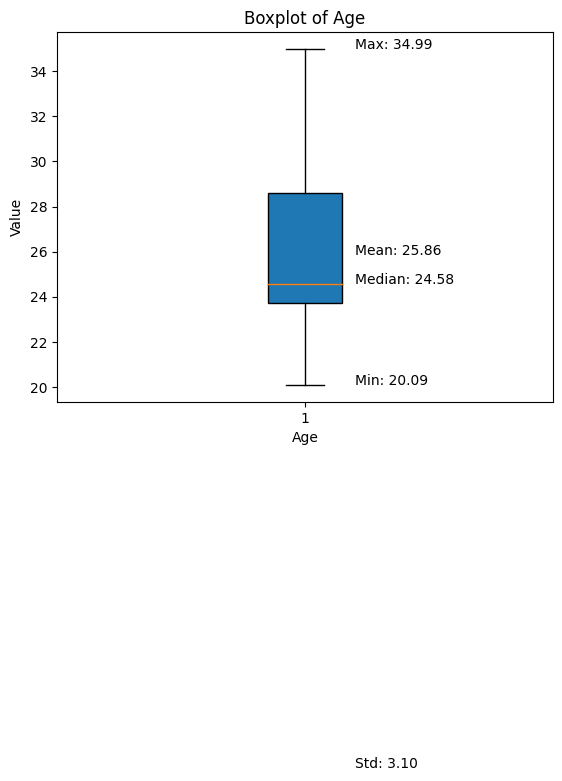

In [22]:
# prompt: Generate boxplot for Age column in chow_hound dataframe and show the number indicators remarks (mean, median, etc)

import matplotlib.pyplot as plt

# Create the boxplot
plt.boxplot(chow_hound['Age'], vert=True, patch_artist=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Boxplot of Age')

# Calculate descriptive statistics
mean_age = chow_hound['Age'].mean()
median_age = chow_hound['Age'].median()
std_age = chow_hound['Age'].std()
min_age = chow_hound['Age'].min()
max_age = chow_hound['Age'].max()

# Display the descriptive statistics on the plot
plt.text(1.1, mean_age, f'Mean: {mean_age:.2f}', fontsize=10)
plt.text(1.1, median_age, f'Median: {median_age:.2f}', fontsize=10)
plt.text(1.1, std_age, f'Std: {std_age:.2f}', fontsize=10)
plt.text(1.1, min_age, f'Min: {min_age:.2f}', fontsize=10)
plt.text(1.1, max_age, f'Max: {max_age:.2f}', fontsize=10)

# Show the plot
plt.show()


In [24]:
# prompt: Show percentiles of Age from chow_hound dataframe with step of 10 (p10, p20, and so on)

# Calculate percentiles with a step of 10
for i in range(10, 101, 10):
  percentile_value = chow_hound['Age'].quantile(i / 100)
  print(f"P{i}: {percentile_value:.2f}")


P10: 23.06
P20: 23.50
P30: 23.86
P40: 24.26
P50: 24.58
P60: 24.95
P70: 28.11
P80: 29.20
P90: 30.63
P100: 34.99


In [23]:
chow_hound.describe()

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate,Time,Cluster
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420,420.000000,420.000000
mean,25.863349,39.326242,2.827597,6.390980,8.389281,9.453812,5.454048,9.638121,2022-06-21 17:05:08.571428352,2.284156,1.854762
min,20.089566,10.496802,0.021648,0.054600,0.026003,0.000447,0.016324,0.000150,2021-11-15 00:00:00,1.193703,0.000000
25%,23.728772,33.164619,0.778902,1.756416,3.260572,2.649286,1.235163,1.607752,2022-01-30 18:00:00,2.000684,1.000000
50%,24.579517,40.500948,1.742489,4.678747,6.758851,7.733219,3.717111,5.200925,2022-05-31 12:00:00,2.342231,2.000000
75%,28.613336,46.696802,3.350457,8.646358,12.377723,14.938225,7.948731,15.415289,2022-10-03 06:00:00,2.672827,3.000000
max,34.991193,60.845802,42.602949,32.831839,30.253100,35.760739,29.065525,43.591156,2023-07-25 00:00:00,2.882957,4.000000
std,3.098497,10.037676,3.985065,6.048664,6.495150,7.890449,5.570200,10.134906,NaN,0.453165,1.378440


There might be a possibility that most of Chow Hounds customer are college student by seeing the age distribution of the customers in which the average age is 25 and 80% of them in the age of <= 29. In addition, the weekly order frequency is also relatively lower at 3 weekly orders which kinda make sense with assumption that college students have relatively lower purchasing power

# Question 5